# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Farhan Ghifari Adhitya
- **Email:** sebuah.celotehan@gmail.com
- **ID Dicoding:** adhityaa_27

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam  beberapa bulan terakhir?
- kategori produk apa yang paling banyak dan palik seidikit mendapatkan revenue?
- Bagaimana demografi pelanggan?


## Import Semua Packages/Library yang Digunakan

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load Tabel Customers

In [16]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'customers_dataset.csv'

#### Load Tabel geolocation

In [4]:
geo_df = pd.read_csv("geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Load Tabel order items

In [5]:
oritems_df = pd.read_csv("order_items_dataset.csv")
oritems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Load tabel order payments

In [6]:
orpayments_df = pd.read_csv("order_payments_dataset.csv")
orpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Load tabel order reviews

In [7]:
orreviews_df = pd.read_csv("order_reviews_dataset.csv")
orreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Load tabel orders

In [8]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Load tabel product category

In [9]:
procategory_df = pd.read_csv("product_category_name_translation.csv")
procategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Load tabel products

In [10]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Load tabel seller

In [11]:
seller_df = pd.read_csv("sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

### Menilai data customers_df

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Jumlah duplikasi: ",customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Menilai data geolocation_df

In [16]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geo_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
print("Jumlah duplikasi: ",geo_df.duplicated().sum())

Jumlah duplikasi:  261831


In [19]:
geo_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Menilai data oritems_df

In [20]:
oritems_df.info()
#shipping limite date seharusnya date time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
oritems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
print("Jumlah duplikasi: ",oritems_df.duplicated().sum())

Jumlah duplikasi:  0


In [23]:
oritems_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai data orpayments_df

In [24]:
orpayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [25]:
orpayments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [26]:
orpayments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Menilai data orreviews_df

In [27]:
orreviews_df.info()
#review_creation_date dan review_answer_timestamp harusnya tiope data timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
orreviews_df.isna().sum()
#terdapat 87656 missing value pda kolom review_comment_title
#Terdapat missing value pada colom Reviw_comment_massage

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [29]:
print("Jumlah duplikasi: ",orreviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
orreviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Menilai data orders_df

In [31]:
orders_df.info()
#pokonya kolom date date timestampe tipe data harus timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
orders_df.isna().sum()
#ada missing value

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [33]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai data product_category_df

In [35]:
procategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
procategory_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [37]:
print("Jumlah duplikasi: ",procategory_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
procategory_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Menilai data products_df

In [39]:
products_df.info()
#tedapat typo dan kesalahan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products_df.isna().sum()
#terdapat missing value

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai data sellers_df

In [43]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [45]:
print("Jumlah duplikasi: ",seller_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Memberiskan table golocation_df

In [47]:
geo_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


#### Memberiskan table order_items_df

##### Memperbaiki tipe data

In [48]:
datetime_columns = ['shipping_limit_date']

for column in datetime_columns:
    oritems_df[column] = pd.to_datetime(oritems_df[column])

oritems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [49]:
oritems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Memberiskan table order_reviews_df

##### Memperbaiki tipe data

In [50]:
datetime_columns = ['review_creation_date','review_answer_timestamp']

for column in datetime_columns:
    orreviews_df[column] = pd.to_datetime(orreviews_df[column])

orreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [51]:
orreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


##### Memperbaiki missing value

In [52]:
orreviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [53]:
orreviews_df['review_comment_title'] = orreviews_df['review_comment_title'].fillna('No Title')
orreviews_df['review_comment_message'] = orreviews_df['review_comment_message'].fillna('No Comment')
orreviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [54]:
orreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


#### Memberiskan table order_df

##### Memperbaiki tipe data

In [55]:
datetime_columns= ['order_purchase_timestamp','order_approved_at',
                   'order_delivered_carrier_date','order_delivered_customer_date',
                   'order_estimated_delivery_date']
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Memperbaiki missingvalue

In [56]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [57]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [58]:
#tidak diperbaiki karena status pesanan canceled

#### Membersihkan products_df

##### Memperbaiki kesalhan tulisan pada kolom

In [59]:
products_df.rename(columns={'product_name_lenght': 'product_name_length',
                            'product_description_lenght':'product_description_length'},
                   inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


##### Memperbaiki missingvalue

In [60]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [61]:
products_df['product_category_name'].fillna('uknown', inplace=True)
isi_column= ['product_name_length','product_description_length',
             'product_photos_qty','product_weight_g',
             'product_length_cm','product_height_cm',
             'product_width_cm']
for column in isi_column:
    products_df[column].fillna(0,inplace=True)

products_df.isna().sum()

C:\Users\farha\AppData\Local\Temp\ipykernel_21320\4090399875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('uknown', inplace=True)
C:\Users\farha\AppData\Local\Temp\ipykernel_21320\4090399875.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [62]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [63]:
products_df.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,47.579527,757.213104,2.148463,2276.334315,30.813207,16.936633,23.195320
std,12.071951,637.745057,1.745732,4281.945502,16.915648,13.637779,12.080033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Memperbaiki tipe data

In [64]:
integer_column = ['product_name_length', 'product_description_length', 'product_photos_qty']

for column in integer_column:
    products_df[column] = products_df[column].astype(int)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  int32  
 3   product_description_length  32951 non-null  int32  
 4   product_photos_qty          32951 non-null  int32  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 1.9+ MB


## Exploratory Data Analysis (EDA)

### Explore customer_df

In [65]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
72240,9b665a2a798904a4f68c8b09f08c65dc,8a36caf2ed634c8838b1f679359bec97,86840,faxinal,PR
11525,e3b91047e6ca3f5e8b656750fa3d61b2,02b3bd80b9721b83c5b155ace3feede9,35519,nova serrana,MG
42066,4aa098ef6289ed1ae1c5ece300060d31,9cd6f2f987359a6660c6eb0d420bea3d,22230,rio de janeiro,RJ
93630,883f2691dc066e86bf57436be6cc4a41,5556b37a456794ad3c6fb2cbd9732a71,22051,rio de janeiro,RJ
79489,6899257ef9335343fd6eaa0daa8c52a8,1a2acc314942f27ddcbcd83d86197293,91150,porto alegre,RS


In [66]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### Persebaran pelanggan berdasarkan city dan state

In [67]:
customers_df.groupby(by='customer_city').customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

In [68]:
customers_df.groupby(by='customer_state').customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

### Explore orders_df

In [69]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
79232,43fe8de87e65010ff44d19a21207029d,2965de1142f42605ba0a478d0f69cb76,delivered,2018-07-16 16:12:33,2018-07-16 16:25:21,2018-07-17 15:41:00,2018-07-23 20:37:55,2018-08-01
59369,894ae039f9d4d37b8b28e3c970326fc4,4d3a8a955c127a274e2b0c612ef213b2,delivered,2018-01-04 20:13:50,2018-01-04 20:31:46,2018-01-06 00:07:45,2018-01-15 14:52:55,2018-02-05
59298,5f498836a73a6ef414a303556f3f83bb,a5c29c5041ae005b9b27fe575835ef3b,delivered,2018-04-25 21:28:23,2018-04-25 21:51:16,2018-04-27 16:00:00,2018-05-07 22:36:48,2018-05-22
58224,b3717753b7626004c921e350a7638879,c6c8563d6eada54426aac104e963f40a,delivered,2018-07-02 23:30:46,2018-07-02 23:50:01,2018-07-04 10:57:00,2018-07-12 20:32:16,2018-08-10
75666,a6acb34f913bfaf8367a31f75d53829f,647210ee29ad619037c52bc024f07650,delivered,2017-10-19 21:02:44,2017-10-19 21:14:41,2017-10-20 17:03:38,2017-11-07 21:37:52,2017-11-07


In [70]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


#### Membuat kolom delivery_time

In [71]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time / 86400)

orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
48921,4d7ca3591e5dc730ad4e00085ebe11c6,4e053dd10862747d48cbd22bf1415ec2,invoiced,2018-04-24 20:40:44,2018-04-24 20:55:46,NaT,NaT,2018-05-08,NaN
8837,8d7bd36f24580dd73c1adff3062b7f5b,082fce44f8c254bf6dc2c4e7bae58467,processing,2017-12-07 10:29:18,2017-12-07 10:52:38,NaT,NaT,2018-01-09,NaN
16458,fdcf099f6b0c76b932c7edea455576d8,d66016b8ab0c0a775bba7b91598d053c,delivered,2017-09-25 10:10:53,2017-09-25 10:30:13,2017-09-29 17:42:58,2017-10-08 16:52:10,2017-10-10,13.0
98066,a900c7725ebcac4b0f0ec847dc715396,895feab4e09ab35f94d2945a3a645806,delivered,2017-12-06 22:07:04,2017-12-08 02:54:04,2017-12-14 21:19:08,2017-12-22 21:17:01,2017-12-29,16.0
8782,f013cb01232922e713ffadcfa3b52368,3a3caef69b01f16c9eb102c28168564f,delivered,2017-06-07 15:04:13,2017-06-07 15:15:16,2017-06-08 14:33:14,2017-06-21 15:33:28,2017-07-04,14.0


In [72]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12.517548
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,210.000000


In [73]:
orders_df.sort_values(by='delivery_time',ascending=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
76910,6a840170ff9f5c99f069b8526d8c21a9,8ca7c9ebd7fe862bbe3af6866f1b2d20,delivered,2018-03-14 09:52:07,2018-03-14 10:08:29,2018-03-14 20:58:54,2018-03-15 21:42:46,2018-03-27,1.0
10221,d178f14aa2410a12c09bfc8d10df51ad,be4b48d66cff1a9eaa83eaff55037d32,delivered,2018-01-03 07:47:45,2018-01-03 07:59:17,2018-01-03 17:32:53,2018-01-04 19:46:48,2018-01-26,1.0
94576,ef160b1ef2464ef2521274c790ee0cef,f68cfaf4a6855d3b1f631852dfd2b2e5,delivered,2017-09-18 15:07:49,2017-09-18 15:32:48,2017-09-18 21:26:42,2017-09-19 18:25:18,2017-09-28,1.0
98567,19f98c610ce8a9b866159c5db4784373,34c7b7a43f4fb3c649c886dac07f7125,delivered,2018-05-10 13:51:45,2018-05-10 14:16:24,2018-05-10 15:25:00,2018-05-11 23:41:32,2018-05-18,1.0
38813,12c35b9467a007081f7b545b5f8fb15b,54383e6aababa529019a76c722f0945c,delivered,2018-05-15 10:14:23,2018-05-15 11:14:27,2018-05-15 14:20:00,2018-05-16 18:34:59,2018-06-01,1.0
...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaN
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,NaN
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,NaN
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,NaN


### Explore customer_df dan orders_df

In [74]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
81660,750107a0e6064f10d67a844bc34c56a0,0326b5f0f7b97564beacafb4bc3f051b,9840,sao bernardo do campo,SP,Active
47469,2e71aa109599d6697fb5a51d88a4600d,215c2d239daabd09b3c264651d945801,3066,sao paulo,SP,Active
13295,614d3b628cf514be479410ed80dc1518,6cc4314c23dcda2c625df58516cdd853,28051,campos dos goytacazes,RJ,Active
14338,37321ae3107bfec4b546019aa642db2a,49c6b1ee895e59043bcd5e2135f08355,65064,sao luis,MA,Active
87937,9e404dfec66c0af0cc6898e439b85b9c,354267e41281961ba40092231d54c4a0,45455,itamari,BA,Active


In [75]:
customers_df.groupby(by='status').customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

#### Menggabungkan customer_df dan orders_df

In [76]:
orcus_df= pd.merge(
    left= orders_df,
    right= customers_df,
    how= 'left',
    left_on= 'customer_id',
    right_on= 'customer_id'
)
orcus_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


#### Jumlah order berdasarkan kota dan state

In [77]:
orcus_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [78]:
orcus_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


### Explore Merge1_df (order_items_df, orders_payments_df dan product_df, product_category_df)

#### Menggabungkan order_items_df dan order_payment_df

In [79]:
oritems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [80]:
orpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [81]:
order1_df = pd.merge(
    left= oritems_df,
    right= orpayments_df,
    how= 'left',
    left_on= 'order_id',
    right_on='order_id'
)
order1_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


#### Menggabungkan product_df dan product_category_df

In [82]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625.0,20.0,17.0,13.0


In [83]:
procategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [84]:
products1_df = pd.merge(
    left= products_df,
    right= procategory_df,
    how='left',
    left_on='product_category_name',
    right_on= 'product_category_name'
)
products1_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625.0,20.0,17.0,13.0,housewares


In [85]:
merge1_df = pd.merge(
    left= order1_df,
    right= products1_df,
    how= 'left',
    left_on= 'product_id',
    right_on= 'product_id'
)
merge1_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,cool_stuff,58,598,4,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,pet_shop,56,239,2,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,moveis_decoracao,59,695,2,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,perfumaria,42,480,1,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,ferramentas_jardim,59,409,1,3750.0,35.0,40.0,30.0,garden_tools


In [86]:
merge1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117604 non-null  object        
 1   order_item_id                  117604 non-null  int64         
 2   product_id                     117604 non-null  object        
 3   seller_id                      117604 non-null  object        
 4   shipping_limit_date            117604 non-null  datetime64[ns]
 5   price                          117604 non-null  float64       
 6   freight_value                  117604 non-null  float64       
 7   payment_sequential             117601 non-null  float64       
 8   payment_type                   117601 non-null  object        
 9   payment_installments           117601 non-null  float64       
 10  payment_value                  117601 non-null  float64       
 11  

In [87]:
revenue_bycategory_df = merge1_df.groupby(by='product_category_name_english').agg({
    'payment_value':['sum','min','max','mean'],
    'order_item_id':'sum'
})
revenue_bycategory_df.rename(columns={
    'payment_value':'revenue',
    'order_item_id':'quantity'
}, inplace=True)
revenue_bycategory_df.sort_values(by=[('revenue', 'mean')], ascending=False).head(10)

revenue                   \
                                             sum    min       max   
product_category_name_english                                       
computers                              279121.55  50.00   6922.21   
fixed_telephony                        207010.26   3.49  13664.08   
small_appliances_home_oven_and_coffee   51229.32  18.06   2960.05   
agro_industry_and_commerce             118730.61   2.35   6081.54   
home_appliances_2                      124563.46   5.56   2455.12   
office_furniture                       646826.49   1.67   2234.66   
signaling_and_security                  68488.05   8.13   3242.84   
construction_tools_safety               65691.03  24.69   3155.82   
musical_instruments                    233074.12   4.68   4513.32   
small_appliances                       225584.38   0.27   4950.34   

                                                   quantity  
                                              mean      sum  
product_category_name_english                                
computers                              1268.734318      253  
fixed_telephony                         763.875498      374  
small_appliances_home_oven_and_coffee   656.786154       79  
agro_industry_and_commerce              471.153214      316  
home_appliances_2                       464.789030      273  
office_furniture                        363.794426     2652  
signaling_and_security                  340.736567      309  
construction_tools_safety               330.105678      257  
musical_instruments                     324.615766      806  
small_appliances                        321.803680      768

In [88]:
price_bycategory_df = merge1_df.groupby(by='product_category_name_english').agg({
    'price': ['min','max','mean']
})
price_bycategory_df.sort_values(by=[('price','mean')],ascending=False)

price                      
                                         min      max         mean
product_category_name_english                                     
computers                              34.50  6729.00  1103.689136
small_appliances_home_oven_and_coffee  10.19  2899.00   627.509103
home_appliances_2                      13.90  2350.00   459.945187
agro_industry_and_commerce             12.99  2990.00   332.706151
musical_instruments                     4.90  4399.87   293.772604
...                                      ...      ...          ...
food_drink                              6.50   699.90    56.621211
cds_dvds_musicals                      45.00    65.00    52.142857
diapers_and_hygiene                    25.00   139.89    40.194615
flowers                                15.60    65.90    33.637576
home_comfort_2                         12.90   219.99    24.940968

[71 rows x 3 columns]

### Eksplore all_df

#### Menggabungkan merge1_df dengan orcus_df

In [89]:
all_df = pd.merge(
    left= merge1_df,
    right= orcus_df,
    how= 'left',
    left_on= 'order_id',
    right_on= 'order_id'
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,Active
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,Active
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,Active
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,Active


In [90]:
all_df.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_category_name               0
product_name_length                 0
product_description_length          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
product_category_name_english    1723
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estima

In [91]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117604 non-null  object        
 1   order_item_id                  117604 non-null  int64         
 2   product_id                     117604 non-null  object        
 3   seller_id                      117604 non-null  object        
 4   shipping_limit_date            117604 non-null  datetime64[ns]
 5   price                          117604 non-null  float64       
 6   freight_value                  117604 non-null  float64       
 7   payment_sequential             117601 non-null  float64       
 8   payment_type                   117601 non-null  object        
 9   payment_installments           117601 non-null  float64       
 10  payment_value                  117601 non-null  float64       
 11  

In [92]:
all_df.groupby(by=['customer_state','product_category_name_english']).agg({
    'payment_value':'sum'
})

payment_value
customer_state product_category_name_english               
AC             auto                                  661.91
               baby                                  871.97
               bed_bath_table                       1377.07
               books_general_interest                757.51
               christmas_supplies                    130.85
...                                                     ...
TO             sports_leisure                       6961.25
               stationery                            350.60
               telephony                            2015.52
               toys                                 2469.97
               watches_gifts                        7274.27

[1356 rows x 1 columns]

In [93]:
top_bystate_df = all_df.groupby(by=['customer_state','product_category_name_english']).agg({
    'payment_value':'sum'
})
top_bystate_df.rename(columns={
    'payment_value':'revenue'
}, inplace=True)
idx = top_bystate_df.groupby('customer_state')['revenue'].idxmax()

top_bystate_df.loc[idx].sort_values(by='revenue', ascending=False)

,,revenue
customer_state,product_category_name_english,
SP,bed_bath_table,765517.23
RJ,bed_bath_table,247744.47
MG,bed_bath_table,218010.61
PR,furniture_decor,114433.72
RS,computers_accessories,108920.98
BA,health_beauty,67016.14
SC,computers_accessories,66379.05
GO,auto,57801.73
PE,health_beauty,57239.84


In [94]:
all_df.groupby(by=['customer_city','product_category_name_english']).agg({
    'payment_value':'sum'
})


payment_value
customer_city       product_category_name_english               
abadia dos dourados books_general_interest                 58.28
                    cool_stuff                            219.63
                    sports_leisure                        135.59
abadiania           small_appliances                     1025.52
abaete              baby                                   82.70
...                                                          ...
ze doca             food_drink                            103.00
                    garden_tools                           66.51
                    musical_instruments                   408.04
                    sports_leisure                        188.50
zortea              computers_accessories                  90.88

[25199 rows x 1 columns]

In [95]:
top_bycity_df = all_df.groupby(by=['customer_city','product_category_name_english']).agg({
    'payment_value':'sum'
})
top_bycity_df.rename(columns={
    'payment_value':'revenue'
}, inplace=True)
idx = top_bycity_df.groupby('customer_city')['revenue'].idxmax()

top_bycity_df.loc[idx].sort_values(by='revenue', ascending=False)

,,revenue
customer_city,product_category_name_english,
sao paulo,computers_accessories,287321.52
rio de janeiro,bed_bath_table,127201.51
belo horizonte,bed_bath_table,51212.79
goiania,auto,48974.99
brasilia,computers_accessories,43838.42
...,...,...
santo antonio do rio abaixo,christmas_supplies,24.23
tamboara,toys,24.09
jenipapo de minas,sports_leisure,22.58


In [96]:
revenuecity_df = all_df.groupby('customer_city').agg({
    'payment_value':['sum','min','max','mean']
})
revenuecity_df.rename(columns={
    'payment_value': 'revenue'
})

revenue                               
                         sum      min      max         mean
customer_city                                              
abadia dos dourados   413.50    58.28   219.63   137.833333
abadiania            1025.52  1025.52  1025.52  1025.520000
abaete               1946.81    50.27   466.89   162.234167
abaetetuba           6237.78    31.94  1537.04   415.852000
abaiara               332.15   131.70   200.45   166.075000
...                      ...      ...      ...          ...
xinguara             1726.63    57.28   608.67   172.663000
xique-xique           230.56    48.69   124.09    76.853333
zacarias              229.85    68.41   161.44   114.925000
ze doca               878.92    66.51   408.04   175.784000
zortea                137.57    46.69    90.88    68.785000

[4110 rows x 4 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana performa penjualan dan revenue perusahaan dalam  beberapa bulan terakhir?


In [97]:
all_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
43208,5df5b6ce88b311095393f226e4366bcf,1,614dd74b96d1a51792de2d9a3475145a,cab85505710c7cb9b720bceb52b01cee,2017-07-26 18:50:22,109.9,26.05,2.0,credit_card,8.0,...,2017-07-20 18:50:22,2017-07-26 00:14:37,2017-08-07 17:56:51,2017-08-22,19.0,161b2eb506dd664bb5d23dc701a14b59,68525,bom jesus do tocantins,PA,Active
70664,9a92634d7c186b507d82bd00823929a2,1,52b5ed64c8cd6a9cd6c33f2a7033991a,0c7533c71df861ec58ad7ff999ed0e8d,2018-04-24 19:12:41,59.9,7.39,1.0,voucher,1.0,...,2018-04-18 19:12:41,2018-04-24 17:26:47,2018-04-26 01:44:48,2018-05-07,8.0,815a6b3971fa68915c80101a220905e4,9450,rio grande da serra,SP,Active
9364,148eb002be64ecda1789c28234f82c49,2,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,2018-03-29 02:11:09,149.9,39.10,1.0,boleto,1.0,...,2018-03-24 02:11:09,2018-03-26 21:08:42,2018-04-03 19:04:25,2018-04-20,12.0,b7343dc001a69a3fc9c31961b5dea892,36500,uba,MG,Active
25059,368b20312c68710e9d75cbb5cef5c469,2,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-01-07 23:36:56,86.9,3.38,2.0,voucher,1.0,...,2018-01-01 23:36:56,2018-01-03 12:33:09,2018-01-09 20:14:51,2018-02-02,8.0,40acd47f4b76c72308a885e4357983a4,28027,campos dos goytacazes,RJ,Active
43099,5dc4353ecb73877d7222007f37958d82,1,4f27f86d1573b8b74b0928ca649abeac,41b39e28db005d9731d9d485a83b4c38,2017-02-21 18:05:22,154.9,22.69,1.0,credit_card,2.0,...,2017-02-17 19:23:02,2017-02-20 10:53:54,2017-03-01 10:05:09,2017-03-20,12.0,4394cce7a16aac93ea8f2c18124b1f92,31030,belo horizonte,MG,Active


In [98]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [99]:
monthly_orders_df = all_df.resample(rule='M',on= 'order_purchase_timestamp').agg({
    'order_id':'nunique',
    'payment_value':'sum'
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
last_sixmonths = monthly_orders_df.iloc[-6:]
last_sixmonths

C:\Users\farha\AppData\Local\Temp\ipykernel_21320\4015025247.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M',on= 'order_purchase_timestamp').agg({


,order_purchase_timestamp,order_count,revenue
19,April,6934,1496811.52
20,May,6853,1506974.84
21,June,6160,1297594.81
22,July,6273,1351705.34
23,August,6452,1229643.72
24,September,1,166.46


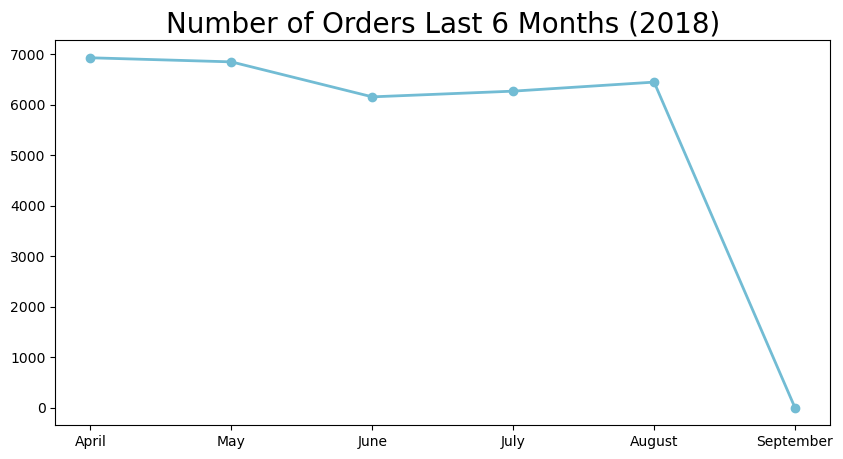

In [100]:
plt.figure(figsize=(10, 5))
plt.plot(
    last_sixmonths['order_purchase_timestamp'], 
    last_sixmonths["order_count"], 
    marker='o', 
    linewidth=2, 
    color="#72BCD4")
plt.title("Number of Orders Last 6 Months (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:

- kategori produk apa yang paling banyak dan palik seidikit mendapatkan revenue?

In [101]:
revenue_category_df = all_df.groupby(by='product_category_name_english').payment_value.sum().sort_values(ascending=True).reset_index()
revenue_category_df.head(10)

,product_category_name_english,payment_value
0,security_and_services,324.51
1,fashion_childrens_clothes,785.67
2,cds_dvds_musicals,1199.43
3,home_comfort_2,1710.54
4,flowers,2213.01
5,arts_and_craftmanship,2326.17
6,la_cuisine,2913.53
7,fashion_sport,3645.92
8,diapers_and_hygiene,4221.25
9,fashio_female_clothing,5109.62


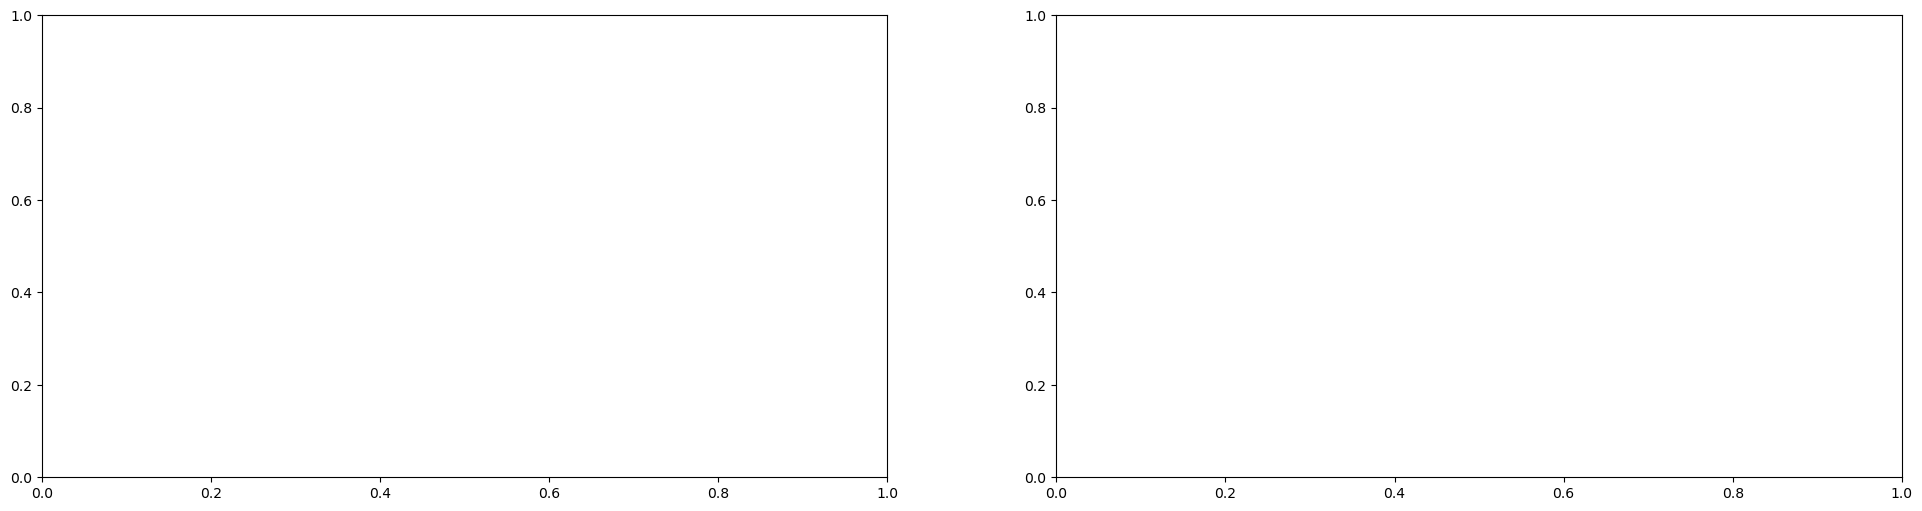

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

C:\Users\farha\AppData\Local\Temp\ipykernel_21320\506315384.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\farha\AppData\Local\Temp\ipykernel_21320\506315384.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


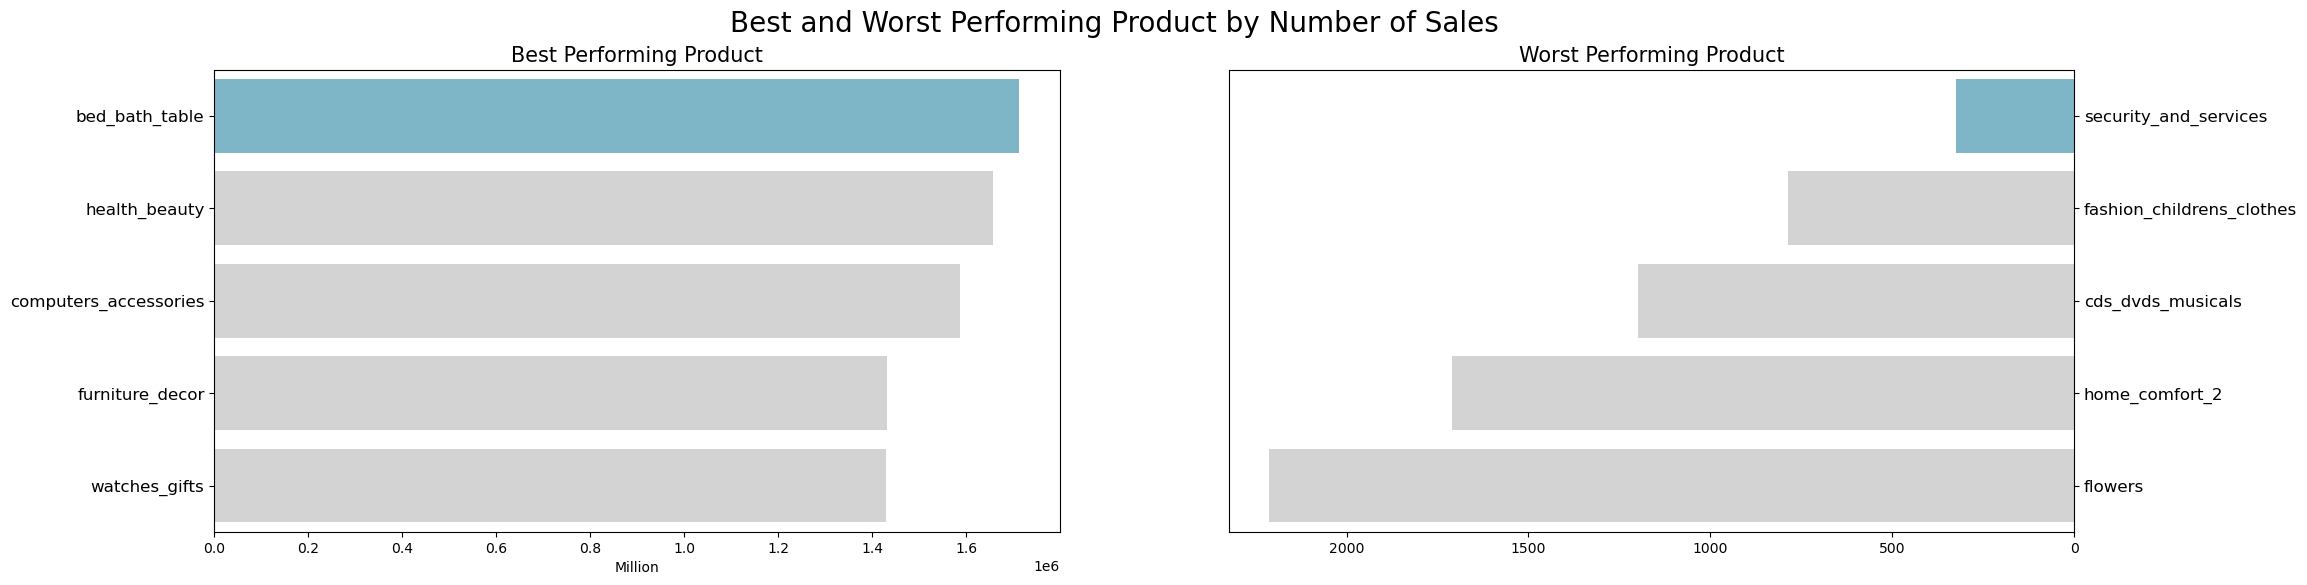

In [105]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors= ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x= "payment_value",
    y= "product_category_name_english",
    data= revenue_category_df.sort_values(by="payment_value", ascending=False).head(5),
    palette= colors,
    ax=ax[0]
)

ax[0].set_ylabel(None)
ax[0].set_xlabel("Million")
ax[0].set_title("Best Performing Product", loc= "center", fontsize= 15)
ax[0].tick_params(axis= 'y',labelsize=12)

sns.barplot(
    x="payment_value",
    y="product_category_name_english",
    data= revenue_category_df.sort_values(by="payment_value", ascending=True).head(5),
    palette= colors,
    ax=ax[1] 
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()


### Pertanyaan 3:

- Bagaimana demografi pelanggan berdasarkan states?

C:\Users\farha\AppData\Local\Temp\ipykernel_21320\1239297026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\farha\AppData\Local\Temp\ipykernel_21320\1239297026.py:4: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


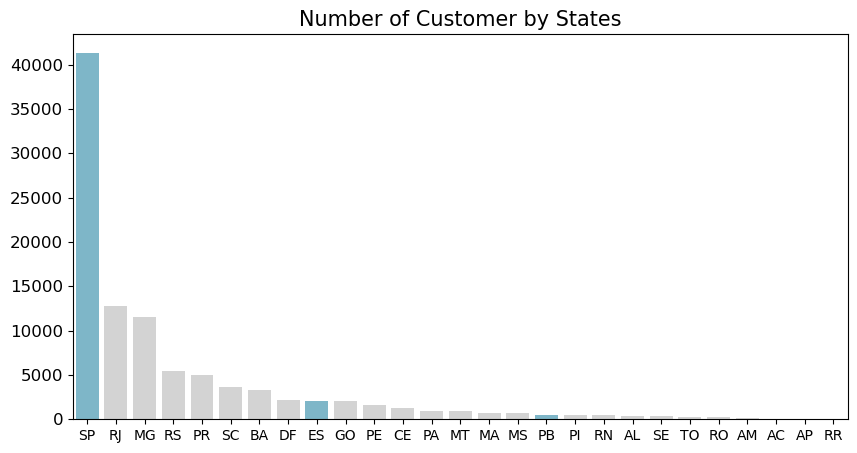

In [106]:
bystate_df= all_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_state", 
    y="customer_id",
    data=bystate_df.sort_values(by="customer_id", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 4:

- Bagaimana RFM Analisisnya?

In [8]:
rfm_df= all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns= ["customer_id","max_order_purchase_timestampe", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_purchase_timestampe"] = rfm_df["max_order_purchase_timestampe"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_purchase_timestampe"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_purchase_timestampe", axis=1, inplace=True)
rfm_df.head()

NameError: name 'all_df' is not defined

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2